In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [ ]:
city_data = pd.read_csv('/content/content/MyDrive/Capstone_Project/Datasets/archive/city_day.csv', encoding='latin-1')

In [ ]:
city_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
city_data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
#converting column Date into Date format
city_data['Date']=pd.to_datetime(city_data['Date'])

In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [ ]:
df1 = city_data.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

In [ ]:
# Printing the number of N/A values in each columns of station_hour dataset
print(df1.isna().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [ ]:
df1 = df1.drop(['AQI_Bucket'],axis=1)

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     29531 non-null  object        
 1   Date     29531 non-null  datetime64[ns]
 2   PM2.5    29531 non-null  float64       
 3   PM10     29531 non-null  float64       
 4   NO       29531 non-null  float64       
 5   NO2      29531 non-null  float64       
 6   NOx      29531 non-null  float64       
 7   NH3      29531 non-null  float64       
 8   CO       29531 non-null  float64       
 9   SO2      29531 non-null  float64       
 10  O3       29531 non-null  float64       
 11  Benzene  29531 non-null  float64       
 12  Toluene  29531 non-null  float64       
 13  Xylene   29531 non-null  float64       
 14  AQI      29531 non-null  float64       
dtypes: datetime64[ns](1), float64(13), object(1)
memory usage: 3.4+ MB


In [ ]:
city_all = df1.pivot_table(values='AQI', index=['Date'], columns='City')
city_all=city_all.add_suffix('_AQI')
city=city_all.resample(rule='MS').mean()
city.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,140.483871,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,118.000000,NaN,...,NaN,NaN,NaN,118.000000,118.0,NaN,NaN,NaN,NaN,NaN
2015-02-01,477.500000,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,118.000000,NaN,...,NaN,NaN,NaN,118.000000,118.0,NaN,NaN,NaN,NaN,NaN
2015-03-01,389.483871,NaN,NaN,NaN,122.451613,NaN,NaN,NaN,157.645161,NaN,...,NaN,NaN,NaN,169.903226,118.0,NaN,NaN,NaN,NaN,NaN
2015-04-01,276.866667,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,173.933333,NaN,...,NaN,NaN,NaN,118.566667,118.0,NaN,NaN,NaN,NaN,NaN
2015-05-01,258.774194,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,NaN,137.000000,118.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#form a new column containing India's AQI for every month by taking the average of all cities for that month
city['India_AQI']=city.mean(axis=1)
city.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,India_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,140.483871,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,118.000000,NaN,...,NaN,NaN,118.000000,118.0,NaN,NaN,NaN,NaN,NaN,153.253456
2015-02-01,477.500000,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,118.000000,NaN,...,NaN,NaN,118.000000,118.0,NaN,NaN,NaN,NaN,NaN,199.346939
2015-03-01,389.483871,NaN,NaN,NaN,122.451613,NaN,NaN,NaN,157.645161,NaN,...,NaN,NaN,169.903226,118.0,NaN,NaN,NaN,NaN,NaN,190.230415
2015-04-01,276.866667,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,173.933333,NaN,...,NaN,NaN,118.566667,118.0,NaN,NaN,NaN,NaN,NaN,177.733333
2015-05-01,258.774194,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,137.000000,118.0,NaN,NaN,NaN,NaN,NaN,182.092166


In [ ]:
#installing pmdarima
!pip install pmdarima;
from pmdarima import auto_arima;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00


In [ ]:
auto_arima(y=city['India_AQI'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   67
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -300.651
Date:                              Fri, 28 Jul 2023   AIC                            611.303
Time:                                      00:47:25   BIC                            622.326
Sample:                                  01-01-2015   HQIC                           615.665
                                       - 07-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.2573      4.264      0.764      0.445      -5.100      11.615
ar.L1          0.7808      0.075     10.342      0.000       0.633       0.929
ar.S.L12       0.9035      0.110      8.225      0.000       0.688       1.119
ma.S.L12      -0.4822      0.247     -1.954      0.051      -0.966       0.001
sigma2       393.9276     71.277      5.527      0.000     254.226     533.629
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 1.61
Prob(Q):                              0.55   Prob(JB):                         0.45
Heteroskedasticity (H):               0.99   Skew:                             0.29
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#dividing into train and test:
train_data=city['India_AQI'][:'2018-12']
test_data=city['India_AQI'][:'2019-12']

from statsmodels.tsa.statespace.sarimax import SARIMAX

#Building the model:
model=SARIMAX(train_data,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results=model.fit()

#printing summry of model reults
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            India_AQI   No. Observations:                   48
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -212.951
Date:                              Fri, 28 Jul 2023   AIC                            435.903
Time:                                      00:47:27   BIC                            445.153
Sample:                                  01-01-2015   HQIC                           439.384
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3310     11.699     -0.028      0.977     -23.262      22.600
ma.L2         -0.6688      7.861     -0.085      0.932     -16.077      14.739
ar.S.L12       0.8331      0.184      4.535      0.000       0.473       1.193
ma.S.L12      -0.2014      0.365     -0.552      0.581      -0.916       0.513
sigma2       392.4454   4598.345      0.085      0.932   -8620.146    9405.036
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 3.08
Prob(Q):                              0.46   Prob(JB):                         0.21
Heteroskedasticity (H):               1.10   Skew:                             0.56
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

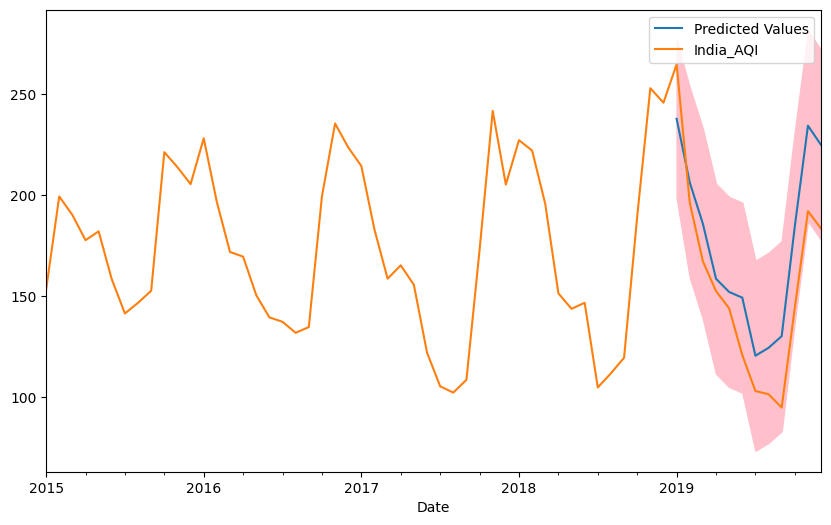

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))

#predict the next 12 months values to compare with the test dataset
forecasts = results.get_forecast(steps=12, dynamic=True)

#find the confidence intervals
confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_AQI']
upper_limits = confidence_intervals.loc[:,'upper India_AQI']

#plot the forecasted mean data for the next 12 months and the confidence interval
forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

#plotting the actual value from test data
test_data.plot(legend=True, ax=ax)

In [ ]:
from sklearn.metrics import mean_squared_error

test= city['India_AQI']['2019-01':'2019-12']
RMSE=np.sqrt(mean_squared_error(forecasts.predicted_mean,test))
print('RMSE = ',RMSE)

y_true=test
y_pred= forecasts.predicted_mean
mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE = ', mape)

RMSE =  27.79571294736437
MAPE =  17.381580318565966


<Axes: xlabel='Date'>

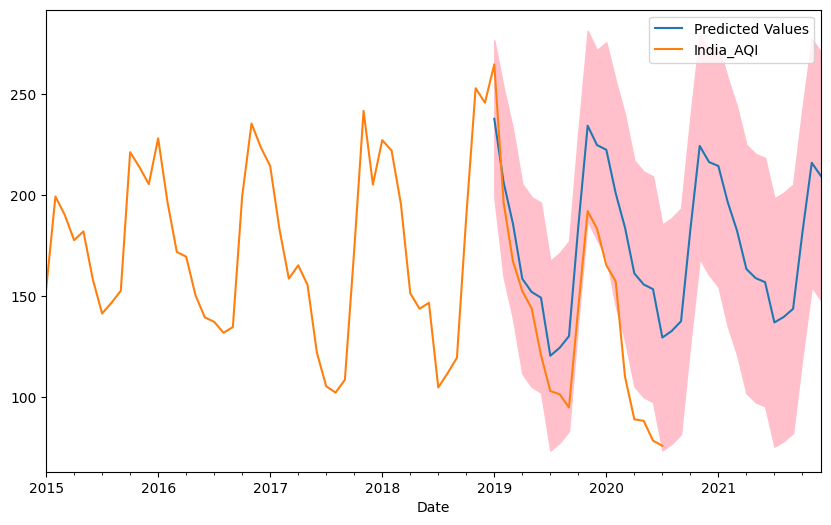

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))

forecasts = results.get_forecast(steps=36, dynamic=True)

confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_AQI']
upper_limits = confidence_intervals.loc[:,'upper India_AQI']

#plot the forecasted data
forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')

#plot the confidence interval as the shaded area
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

#Plot India's AQI Data
city['India_AQI'].plot(legend=True, ax=ax)

In [ ]:
from google.colab import files
import pickle

# Save the DataFrame as a pickle file
with open('city.pickle', 'wb') as f:
    pickle.dump(city['India_AQI'], f)

files.download('city.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>